In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
%matplotlib inline
from math import sqrt

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import get_scorer_names

import shap
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:/Users/Vasanth M/jupyter_codes/site_energy_intensity_pred/train_dataset.csv")
df

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.500000,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.500000,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.500000,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.500000,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.500000,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,6,State_11,Commercial,Office_Uncategorized,20410.0,1995.0,8.0,36.6,28,43.451613,...,25,3,0,0,NaN,NaN,NaN,NaN,132.918411,75752
75753,6,State_11,Residential,5plus_Unit_Building,40489.0,1910.0,98.0,36.6,28,43.451613,...,25,3,0,0,NaN,NaN,NaN,NaN,39.483672,75753
75754,6,State_11,Commercial,Commercial_Other,28072.0,1917.0,NaN,36.6,26,36.612903,...,6,0,0,0,NaN,NaN,NaN,NaN,48.404398,75754
75755,6,State_11,Commercial,Commercial_Other,53575.0,2012.0,NaN,36.6,26,36.612903,...,6,0,0,0,NaN,NaN,NaN,NaN,592.022750,75755


Exploratory Data Analysis

In [3]:
df.shape

(75757, 64)

In [4]:
df.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [6]:
df.describe(include="O").T

,count,unique,top,freq
State_Factor,75757,7,State_6,50840
building_class,75757,2,Residential,43558
facility_type,75757,60,Multifamily_Uncategorized,39455


In [7]:
df.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,...,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,...,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,...,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601,18939.000000
50%,5.000000,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,...,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716,37878.000000
75%,6.000000,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,...,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,131.000000,97.277534,56817.000000
max,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,91.000000,48.000000,65.107143,...,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,311.000000,997.866120,75756.000000


In [8]:
df.isna().sum()

Year_Factor                      0
State_Factor                     0
building_class                   0
facility_type                    0
floor_area                       0
                             ...  
direction_peak_wind_speed    41811
max_wind_speed               41082
days_with_fog                45796
site_eui                         0
id                               0
Length: 64, dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.sample(n=5,random_state=1)

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
53475,6,State_6,Residential,Multifamily_Uncategorized,80679.0,1926.0,96.0,3.4,11,34.451613,...,96,17,0,0,1.0,1.0,1.0,NaN,66.617486,53475
8389,5,State_2,Commercial,Office_Uncategorized,406131.0,2012.0,89.0,3.0,8,29.966667,...,113,22,0,0,NaN,NaN,NaN,NaN,47.663983,8389
65285,6,State_6,Residential,Multifamily_Uncategorized,70000.0,2012.0,87.0,24.4,11,34.451613,...,96,17,0,0,NaN,NaN,NaN,NaN,59.337432,65285
41023,4,State_6,Residential,Multifamily_Uncategorized,104437.0,2006.0,37.0,42.7,4,28.596774,...,75,4,0,0,1.0,1.0,1.0,NaN,103.318716,41023
51030,5,State_6,Commercial,Warehouse_Selfstorage,128864.0,2007.0,NaN,21.3,8,29.854839,...,106,12,0,0,NaN,NaN,NaN,NaN,7.695571,51030


Graphical intrepretation

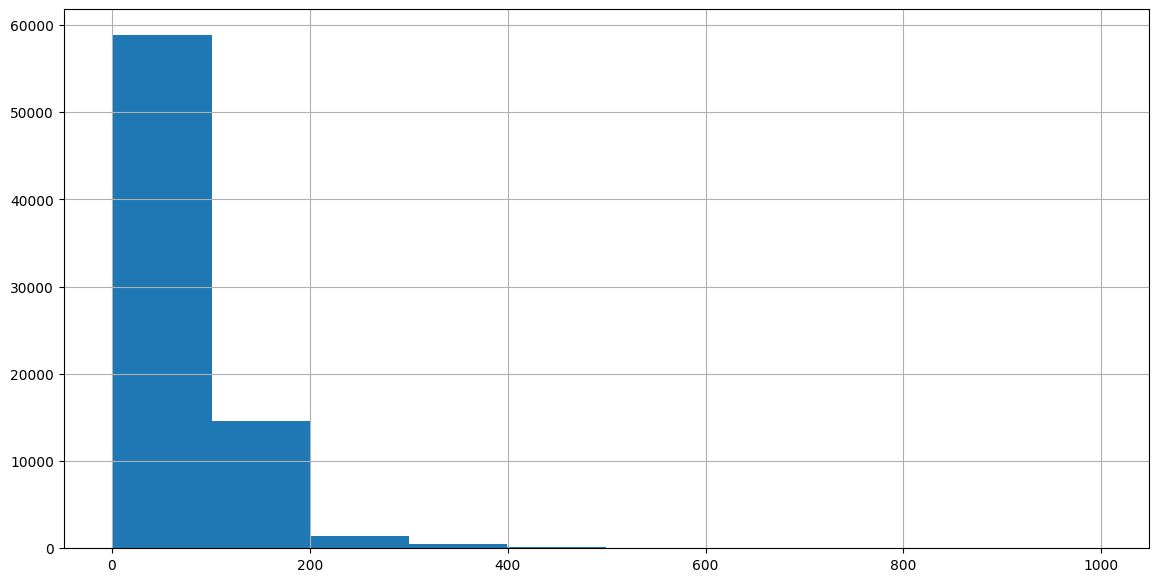

In [11]:
plt.figure(figsize=(14,7))
df["site_eui"].hist()
plt.show()

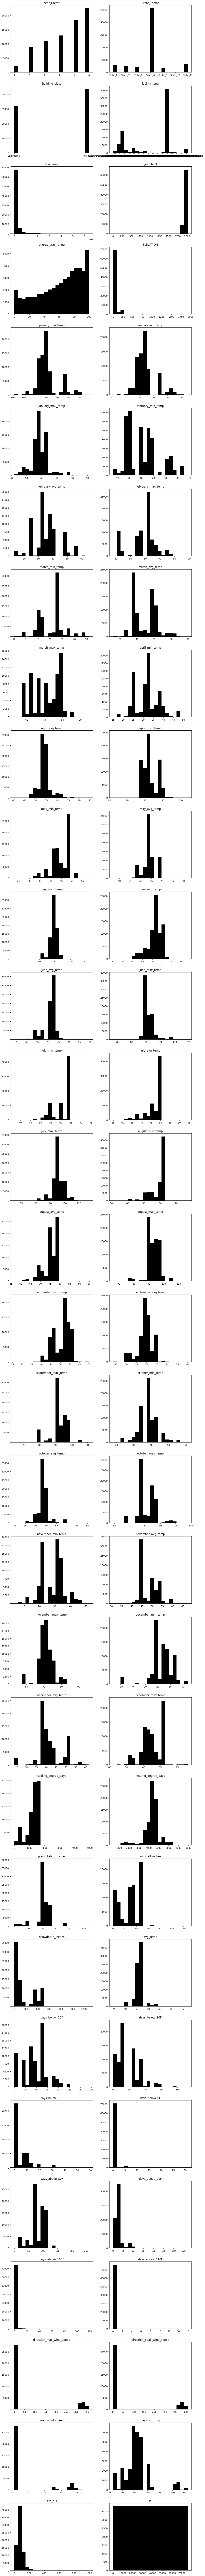

In [12]:
fig = plt.figure(figsize=(14,200))
col  = df.columns
n =1
for feature in col:
    ax1 = fig.add_subplot(32,2,n)
    ax1.hist(df[feature],bins=20,color="k")
    ax1.set_title(feature)
    n+=1



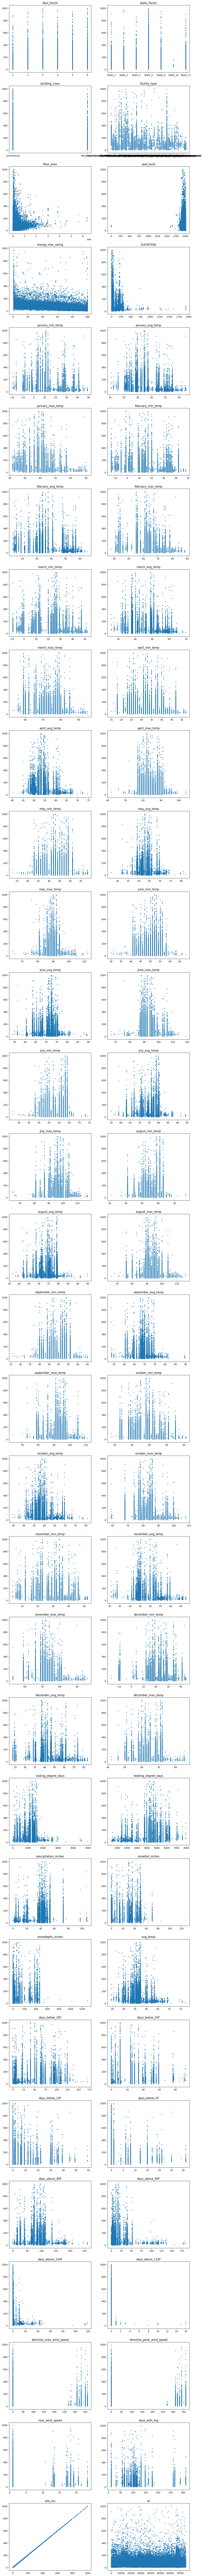

In [13]:
fig = plt.figure(figsize=(14,200))
tar = df["site_eui"]
col  = df.columns
n =1
for feature in col:
    ax1 = fig.add_subplot(32,2,n)
    ax1.scatter(x=df[feature],y=tar,s=5)
    ax1.set_title(feature)
    n+=1



PREPROCESSSING 

In [14]:
df.isna().sum()[df.isna().sum() != 0]


year_built                    1837
energy_star_rating           26709
direction_max_wind_speed     41082
direction_peak_wind_speed    41811
max_wind_speed               41082
days_with_fog                45796
dtype: int64

In [17]:
cols = ["year_built",
"energy_star_rating",
"direction_max_wind_speed",
"direction_peak_wind_speed",
"max_wind_speed",
"days_with_fog"]

imputer = KNNImputer(n_neighbors=3)
df[cols] = imputer.fit_transform(df[cols])



In [ ]:

df[cols]

,year_built,energy_star_rating,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog
0,1942.0,11.0,1.0,1.0,1.0,NaN
1,1955.0,45.0,1.0,NaN,1.0,12.0
2,1951.0,97.0,1.0,NaN,1.0,12.0
3,1980.0,46.0,1.0,NaN,1.0,12.0
4,1985.0,100.0,1.0,1.0,1.0,NaN
...,...,...,...,...,...,...
75752,1995.0,8.0,NaN,NaN,NaN,NaN
75753,1910.0,98.0,NaN,NaN,NaN,NaN
75754,1917.0,NaN,NaN,NaN,NaN,NaN
75755,2012.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df[cols].isna().sum()

year_built                   0
energy_star_rating           0
direction_max_wind_speed     0
direction_peak_wind_speed    0
max_wind_speed               0
days_with_fog                0
dtype: int64

In [ ]:
categ = ["State_Factor","building_class","facility_type"]
for i in categ:
    df[i] = LabelEncoder().fit_transform(df[i])
df


,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,0,0,13,61242.0,1942.0,11.0,2.4,36,50.500000,...,14,0,0,0,1.0,1.0,1.0,50.5,248.682615,0
1,1,0,0,55,274000.0,1955.0,45.0,1.8,36,50.500000,...,14,0,0,0,1.0,1.0,1.0,12.0,26.500150,1
2,1,0,0,48,280025.0,1951.0,97.0,1.8,36,50.500000,...,14,0,0,0,1.0,1.0,1.0,12.0,24.693619,2
3,1,0,0,6,55325.0,1980.0,46.0,1.8,36,50.500000,...,14,0,0,0,1.0,1.0,1.0,12.0,48.406926,3
4,1,0,0,56,66000.0,1985.0,100.0,2.4,36,50.500000,...,14,0,0,0,1.0,1.0,1.0,50.5,3.899395,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,6,2,0,32,20410.0,1995.0,8.0,36.6,28,43.451613,...,25,3,0,0,330.0,340.0,17.4,141.0,132.918411,75752
75753,6,2,1,1,40489.0,1910.0,98.0,36.6,28,43.451613,...,25,3,0,0,1.0,1.0,1.0,99.0,39.483672,75753
75754,6,2,0,2,28072.0,1917.0,55.0,36.6,26,36.612903,...,6,0,0,0,1.0,1.0,1.0,88.0,48.404398,75754
75755,6,2,0,2,53575.0,2012.0,67.5,36.6,26,36.612903,...,6,0,0,0,1.0,1.0,1.0,108.0,592.022750,75755


In [ ]:
scale = StandardScaler()
c = ["Year_Factor","State_Factor","building_class","year_built"]
not_in_c = [i for i in df.columns if i not in c]
df_scale = scale.fit_transform(df[not_in_c])
df_scaled = pd.DataFrame(df_scale,columns= not_in_c )
df_scaled


,facility_type,floor_area,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,-1.110481,-0.424272,-2.089274,-0.611748,2.618884,2.314092,1.670279,1.850925,1.698778,1.724835,...,-2.717656,-1.284612,-0.124112,-0.017181,-0.469557,-0.469531,-0.467339,-0.961807,2.851221,-1.732028
1,2.496116,0.437535,-0.787710,-0.621640,2.618884,2.314092,1.670279,1.850925,1.698778,1.724835,...,-2.717656,-1.284612,-0.124112,-0.017181,-0.469557,-0.469531,-0.467339,-1.771840,-0.962742,-1.731982
2,1.895016,0.461940,1.202916,-0.621640,2.618884,2.314092,1.670279,1.850925,1.698778,1.724835,...,-2.717656,-1.284612,-0.124112,-0.017181,-0.469557,-0.469531,-0.467339,-1.771840,-0.993753,-1.731936
3,-1.711580,-0.448240,-0.749429,-0.621640,2.618884,2.314092,1.670279,1.850925,1.698778,1.724835,...,-2.717656,-1.284612,-0.124112,-0.017181,-0.469557,-0.469531,-0.467339,-1.771840,-0.586692,-1.731891
4,2.581987,-0.404999,1.317760,-0.611748,2.618884,2.314092,1.670279,1.850925,1.698778,1.724835,...,-2.717656,-1.284612,-0.124112,-0.017181,-0.469557,-0.469531,-0.467339,-0.961807,-1.350704,-1.731845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,0.521075,-0.589668,-2.204118,-0.047915,1.766093,1.306613,-0.570441,1.771416,1.369806,0.655260,...,-2.282577,-1.010488,-0.124112,-0.017181,2.523467,2.559306,2.458691,0.942298,0.864024,1.731845
75753,-2.140937,-0.508335,1.241197,-0.047915,1.766093,1.306613,-0.570441,1.771416,1.369806,0.655260,...,-2.282577,-1.010488,-0.124112,-0.017181,-0.469557,-0.469531,-0.467339,0.058625,-0.739868,1.731891
75754,-2.055066,-0.558632,-0.404898,-0.047915,1.552895,0.329104,-2.064254,1.453380,0.689223,-0.057790,...,-3.034077,-1.284612,-0.124112,-0.017181,-0.469557,-0.469531,-0.467339,-0.172813,-0.586736,1.731936
75755,-2.055066,-0.455329,0.073618,-0.047915,1.552895,0.329104,-2.064254,1.453380,0.689223,-0.057790,...,-3.034077,-1.284612,-0.124112,-0.017181,-0.469557,-0.469531,-0.467339,0.247983,8.744964,1.731982


In [ ]:
df_final = pd.concat([df[c],df_scaled],axis=1)
df_final

,Year_Factor,State_Factor,building_class,year_built,facility_type,floor_area,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,0,0,1942.0,-1.110481,-0.424272,-2.089274,-0.611748,2.618884,2.314092,...,-2.717656,-1.284612,-0.124112,-0.017181,-0.469557,-0.469531,-0.467339,-0.961807,2.851221,-1.732028
1,1,0,0,1955.0,2.496116,0.437535,-0.787710,-0.621640,2.618884,2.314092,...,-2.717656,-1.284612,-0.124112,-0.017181,-0.469557,-0.469531,-0.467339,-1.771840,-0.962742,-1.731982
2,1,0,0,1951.0,1.895016,0.461940,1.202916,-0.621640,2.618884,2.314092,...,-2.717656,-1.284612,-0.124112,-0.017181,-0.469557,-0.469531,-0.467339,-1.771840,-0.993753,-1.731936
3,1,0,0,1980.0,-1.711580,-0.448240,-0.749429,-0.621640,2.618884,2.314092,...,-2.717656,-1.284612,-0.124112,-0.017181,-0.469557,-0.469531,-0.467339,-1.771840,-0.586692,-1.731891
4,1,0,0,1985.0,2.581987,-0.404999,1.317760,-0.611748,2.618884,2.314092,...,-2.717656,-1.284612,-0.124112,-0.017181,-0.469557,-0.469531,-0.467339,-0.961807,-1.350704,-1.731845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,6,2,0,1995.0,0.521075,-0.589668,-2.204118,-0.047915,1.766093,1.306613,...,-2.282577,-1.010488,-0.124112,-0.017181,2.523467,2.559306,2.458691,0.942298,0.864024,1.731845
75753,6,2,1,1910.0,-2.140937,-0.508335,1.241197,-0.047915,1.766093,1.306613,...,-2.282577,-1.010488,-0.124112,-0.017181,-0.469557,-0.469531,-0.467339,0.058625,-0.739868,1.731891
75754,6,2,0,1917.0,-2.055066,-0.558632,-0.404898,-0.047915,1.552895,0.329104,...,-3.034077,-1.284612,-0.124112,-0.017181,-0.469557,-0.469531,-0.467339,-0.172813,-0.586736,1.731936
75755,6,2,0,2012.0,-2.055066,-0.455329,0.073618,-0.047915,1.552895,0.329104,...,-3.034077,-1.284612,-0.124112,-0.017181,-0.469557,-0.469531,-0.467339,0.247983,8.744964,1.731982


In [ ]:
X = df_final.drop(["site_eui","id"], axis=1)
y = df_final['site_eui']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
def modelling(X_train, X_test, y_train, y_test,**kwargs):
    models=[]
    scores = {}
    if 'dct' in kwargs.keys() and kwargs['dct']:
        dct = DecisionTreeRegressor()
        dct.fit(X_train,y_train)
        y_pred = dct.predict(X_test)
        scores["dct"] = [sqrt(mean_squared_error(y_test,y_pred))]
    if "rfor" in kwargs.keys() and kwargs['dct']:
        rfor = RandomForestRegressor()
        rfor.fit(X_train,y_train)
        y_pred = rfor.predict(X_test)
        scores["rfor"] = [sqrt(mean_squared_error(y_test,y_pred))]
    if "svm" in kwargs.keys() and kwargs['svm']:
        svm = SVR()
        svm.fit(X_train,y_train)
        y_pred = svm.predict(X_test)
        scores["svm"] = [sqrt(mean_squared_error(y_test,y_pred))]
    return scores
    
    

In [ ]:
modelling(X_train, X_test, y_train, y_test,rfor=True)

{'dct': [1.0035398223855652],
 'rfor': [0.7008373945305436],
 'svm': [0.9644047953385237]}

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
sqrt(mean_squared_error(y_pred,y_test))

0.7012060636547203

In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
X,y = shap.datasets.adult()
model = rf.fit(X, y)

# compute SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

100%|===================| 32541/32561 [51:33<00:01]        

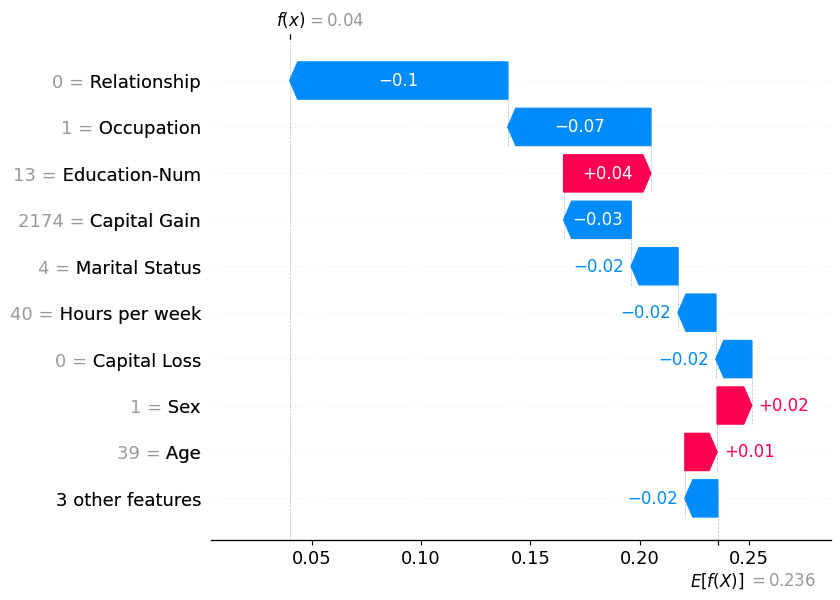

In [ ]:
shap.plots.waterfall(shap_values[0])